# Generation

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.models import load_model
from tensorflow.keras.utils import plot_model, to_categorical
size = 64

In [2]:
(h, w) = (size, size)
center = (size/2, size/2)

In [3]:
def konhueta(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(-np.pi, np.pi, 200) 
    else:
        t = np.linspace(-np.pi/2, np.pi/2, 200) 
    x = wight + hight*np.cos(t);
    y = wight*np.tan(t) + hight*np.sin(t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [4]:
def ellipse(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(0, 2*np.pi, 200)
    else:
        t = np.linspace(np.pi, 2*np.pi, 200)
    x = wight * np.cos(t)
    y = hight * np.sin(t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        clr = np.random.randint(clr_mim, clr_max)
        image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [5]:
def paskal_snail(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(0, 2*np.pi, 200) 
    else:
        t = np.linspace(0, np.pi, 200) 
    x = 2*wight*np.cos(t) - hight*np.cos(2*t)
    y = 2*wight*np.sin(t) - hight* np.sin(2*t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [6]:
def create_figure(figure, noise_level=1, half=False):
    weight, height = np.random.uniform(size_min, size_max), np.random.uniform(size_min, size_max)
    angle = np.random.uniform(angle_min, angle_max)
    image = figure(weight, height, angle, noise_level, half)
    return image

In [40]:
file_name_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_train = open(file_name_train, 'wb')
file_lable_train = open(file_lable_train, 'wb')
train_matrices = []
train_labels = []
for i in range(600):
    size_min, size_max = 10, 30
    angle_min, angle_max = 0, 90
    label = 0 # ellipse
    image = create_figure(ellipse, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 1 # half-ellipse
    image = create_figure(ellipse, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)
       
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 180
    label = 2 # konhoida
    image = create_figure(konhueta, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 3 # half-konhoida
    image = create_figure(konhueta, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)
    
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 90
    label = 4 # snail
    image = create_figure(paskal_snail, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 5 # half-snail
    image = create_figure(paskal_snail, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)

train_matrices = np.array(train_matrices, dtype=np.uint8)
train_labels = np.array(train_labels, dtype=np.uint8)
train_matrices.tofile(file_train)
train_labels.tofile(file_lable_train)
file_train.close();
file_lable_train.close();

#Test
file_name_test = 'data_test.bin'
file_lable_test = 'label_test.bin'
file_test = open(file_name_test, 'wb')
file_lable_test = open(file_lable_test, 'wb')
test_matrices = []
test_labels = []
for i in range(100):
    size_min, size_max = 10, 30
    angle_min, angle_max = 0, 90
    label = 0 # ellipse
    image = create_figure(ellipse, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 1 # half-ellipse
    image = create_figure(ellipse, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
       
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 180
    label = 2 # konhoida
    image = create_figure(konhueta, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 3 # half-konhoida
    image = create_figure(konhueta, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
    
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 90
    label = 4 # snail
    image = create_figure(paskal_snail, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 5 # half-snail
    image = create_figure(paskal_snail, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
    
test_matrices = np.array(test_matrices, dtype=np.uint8)
test_labels = np.array(test_labels, dtype=np.uint8)
test_matrices.tofile(file_test)
test_labels.tofile(file_lable_test)    
file_test.close()
file_lable_test.close()

In [50]:
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, imsize * imsize)
    x_test = x_test.reshape(-1, imsize * imsize)
    return x_train, y_train, x_test, y_test

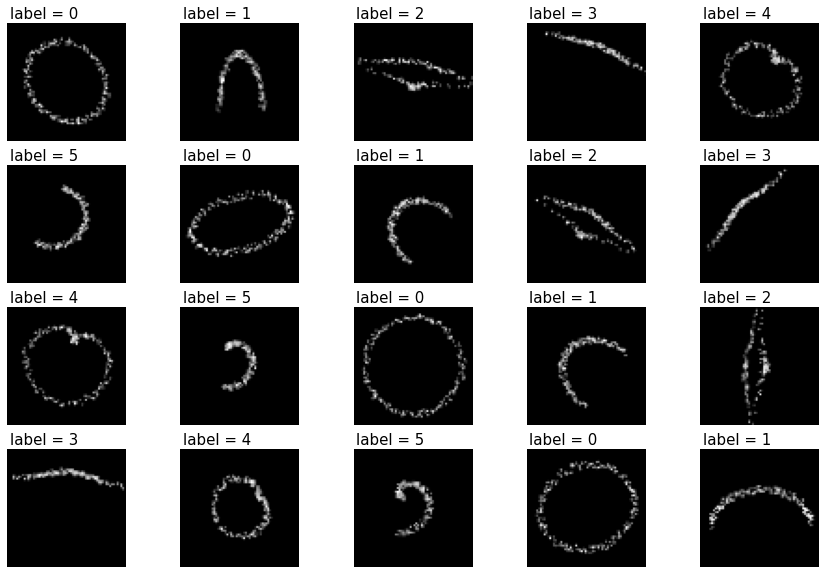

In [51]:
file_image_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_image_test = 'data_test.bin'
file_lable_test = 'label_test.bin'

fig, ax = plt.subplots(4,5, figsize=(15,10))

x_train, y_train, x_test, y_test = load_from_binary(file_name_train, file_lable_train,
                                                   file_name_test, file_lable_test, 64)


for i in range(4):
    for j in range(5):
        ax[i][j].imshow(x_train[i*5 + j].reshape(64,64), cmap = 'gray')
        ax[i][j].axis('off')
        ax[i][j].text(1, -3, f'label = {y_train[i*5+j]}', size=15)

2472
636
2154
2844
3168
1296
870
2485
2491
3493
235
2089
3277
3079
878
1220
2552
2156
2816
602
380
3411
2817
1227
3219
1515
2799
2115
3268
2818
2782
118
2146
400
1786
749
1685
641
2267
2939
3557
2429


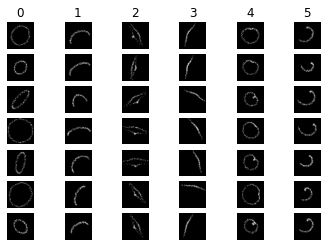

In [59]:
classes = list(np.arange(6))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((x_train[idx]*255).reshape(64, 64).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Modeling

In [12]:
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((0, 1.5*max(val_loss + loss)))
    ax[1].set_ylim((0, max(val_acc + acc)))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()

## MNIST

In [13]:
num_classes = 10
img_rows = img_cols = 28

In [32]:
file_image_train = 'mnist/data_train.bin'
file_lable_train = 'mnist/label_train.bin'
file_image_test = 'mnist/data_test.bin'
file_lable_test = 'mnist/label_test.bin'
x_train, y_train, x_test, y_test = load_from_binary('')

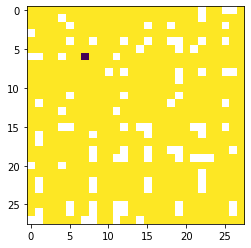

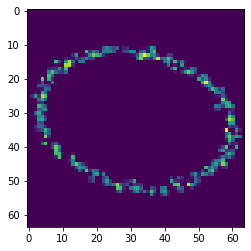